##### Plotando curva de histerese normalizada
<p>Este script varre o diretorio onde estão localizados os arquivos .txt contendo as medidas a serem normalizadas obtidas no VSM - e já com o drift ajustado, para quais foram necessários - e plota eles num gráfico Magnetização por Magnetização de Saturação.</p>


In [9]:
"""
CARREANDO MÓDULOS NECESSÁRIOS
"""

import numpy as np #manipulação de arrays e aplicações matemáticas -CLEIZA #type:ignore 
import pandas as pd #manipulação de dataframes -ABQ #type:ignore
import matplotlib.pyplot as plt #plot de figuras  -CLEIZA #type: ignore
import os #manipulação de diretórios/arquivos -CLEIZA
from caminhosDiretorios import dirDadosDesteDispositivo as dirDados, dirGraficosDesteDispositivo as dirGraficos #de caminhoDosDiretorios.py, chamamos aqui duas variáveis que guardam respectivamente o caminho do diretório onde estão os arquivos de dados deste dispositivo e o caminho do diretório onde serão salvos os gráficos neste dispositivo -ABQ
from funcoesNomeDeArquivo import extrairPartesDoNome, extrair_angulo, nomeConcatenadoDaAmostra #de funcoesNomeDeArquivo.py, chamamos aqui funcoes que extraem partes do nome do arquivo -ABQ
from funcoesDeMatrizENormalizacao import funcaoNormalizadora, metadeDoVetor #de funcoesDeMAtrizENormalizacao.py, chamamos uma função que normaliza os dados de um vetor alvo -ABQ

"""
CHAMANDO E RECONHECENDO DADOS
"""

#subdiretorio especifico que este script vai varrer para extrair os dados especificos, neste caso, será "/dadosANormalizar/". -ABQ
subdiretorioAVarrer = dirDados+"dadosMenosDrift/"

# Lista todos os arquivos na pasta -CLEIZA
arquivos = os.listdir(subdiretorioAVarrer)

# Filtra apenas os arquivos .txt -CLEIZA
arquivos_txt = [arquivo for arquivo in arquivos if arquivo.endswith('.txt')]

arquivos_txt.sort()

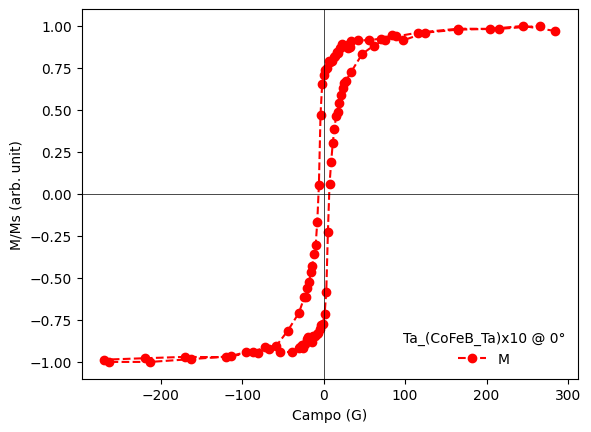

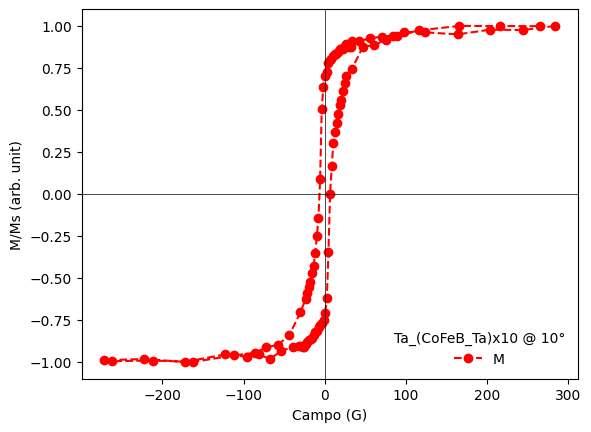

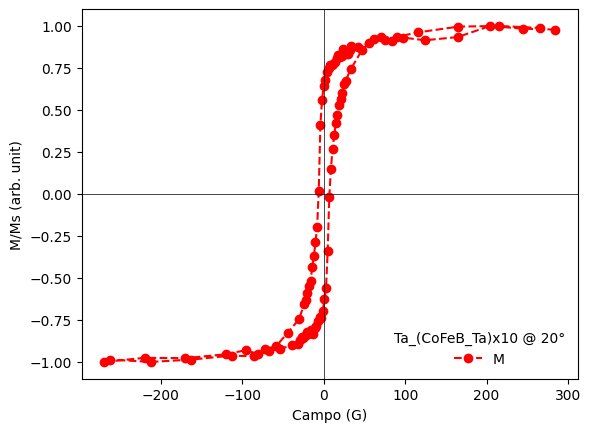

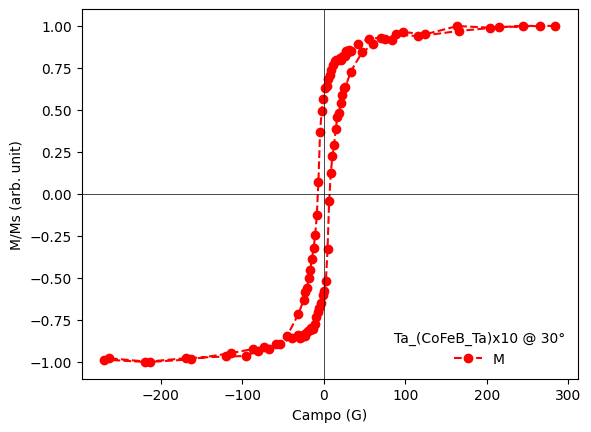

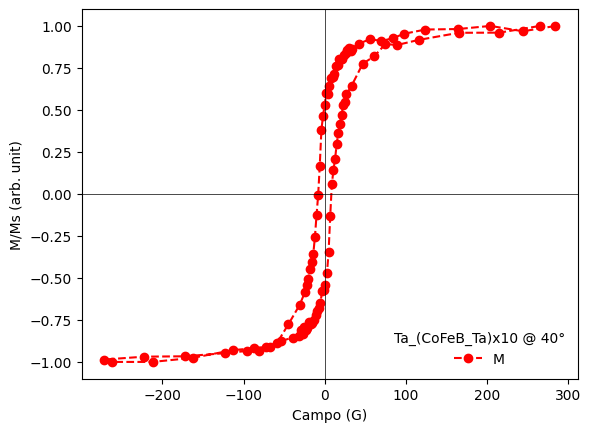

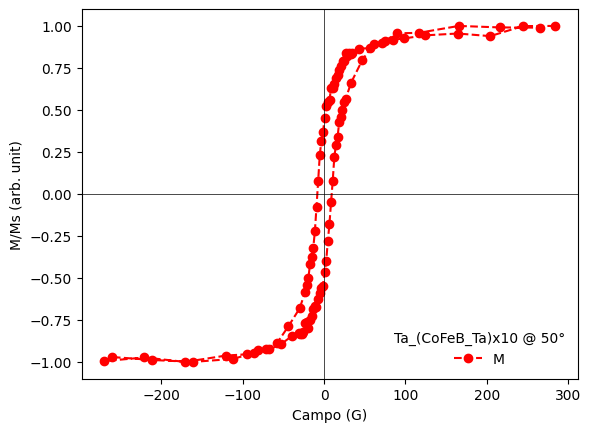

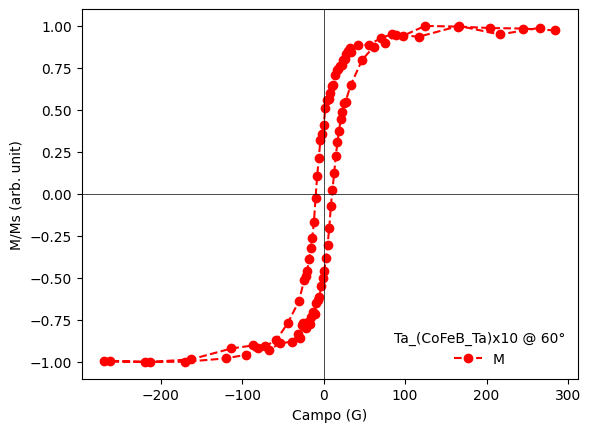

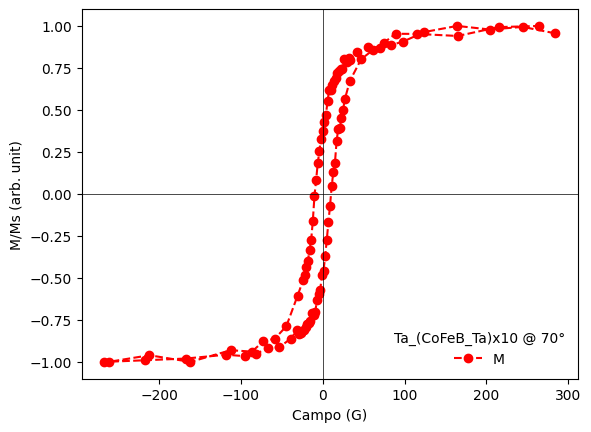

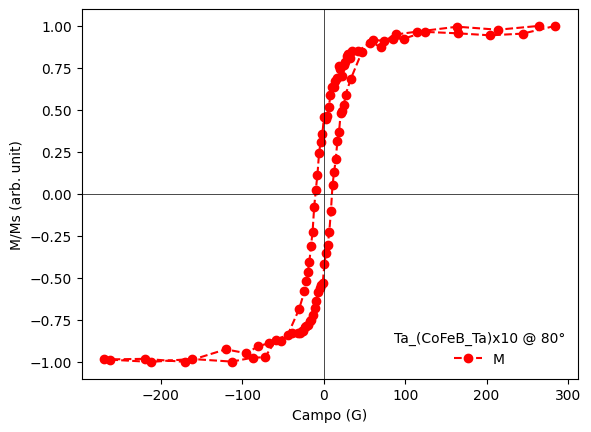

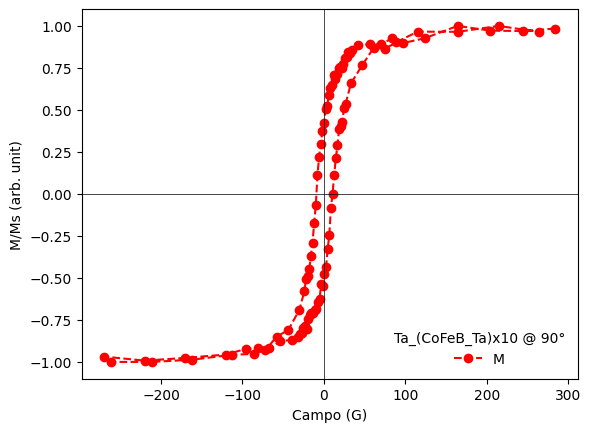

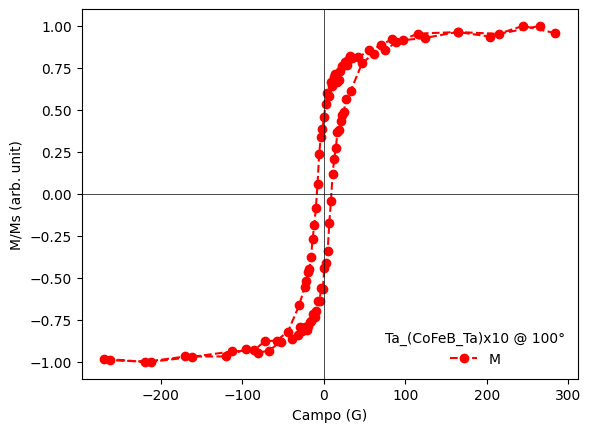

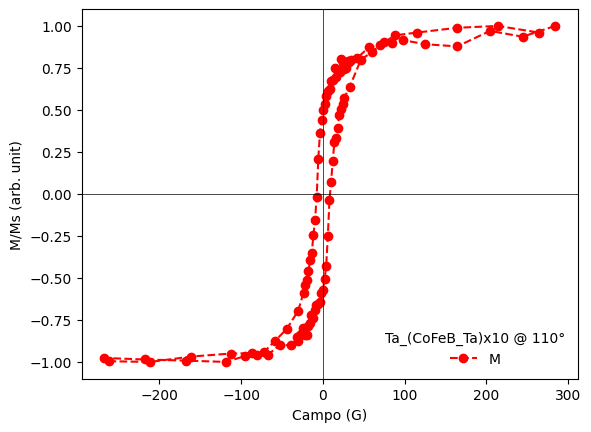

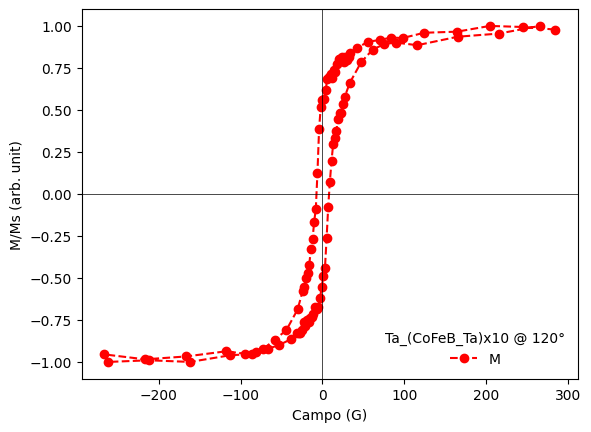

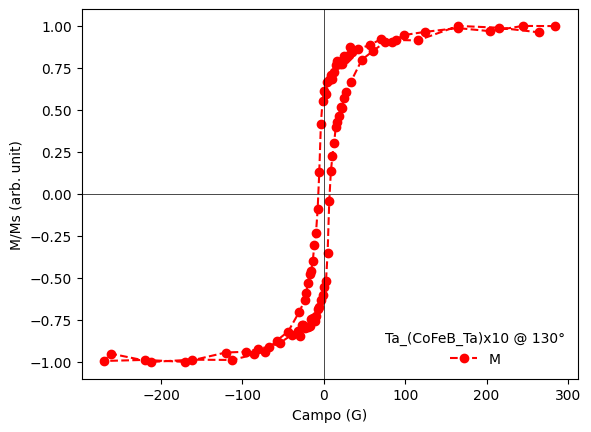

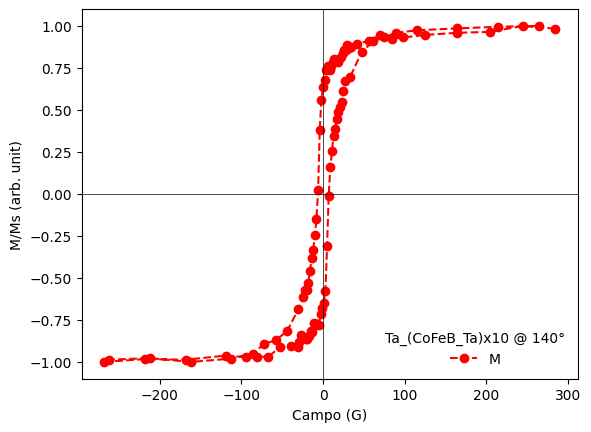

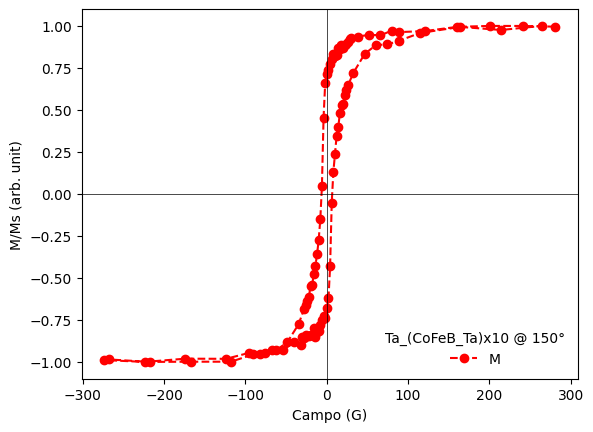

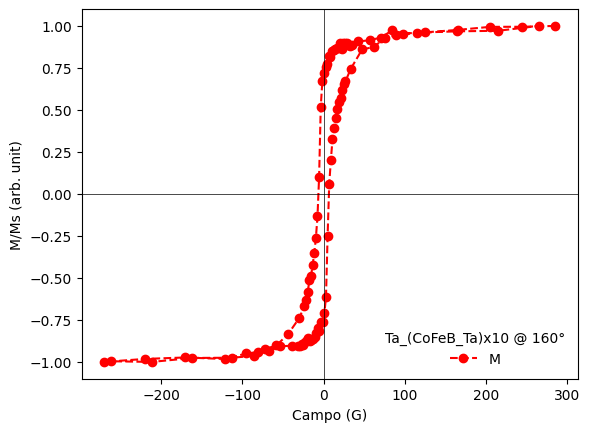

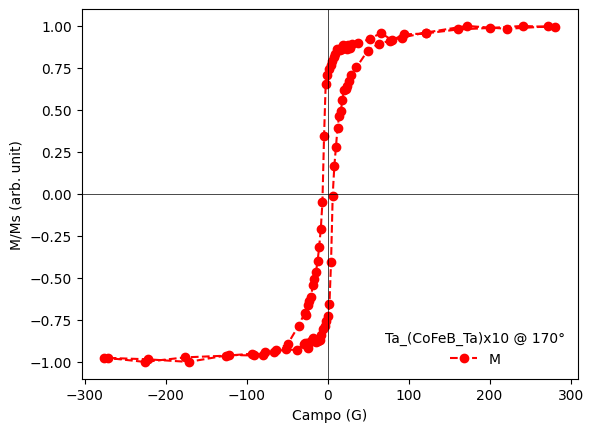

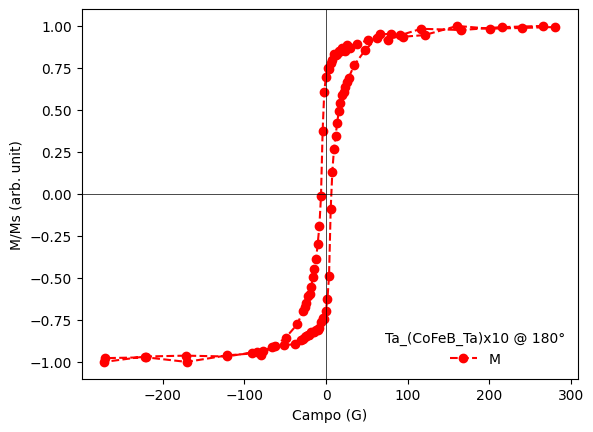

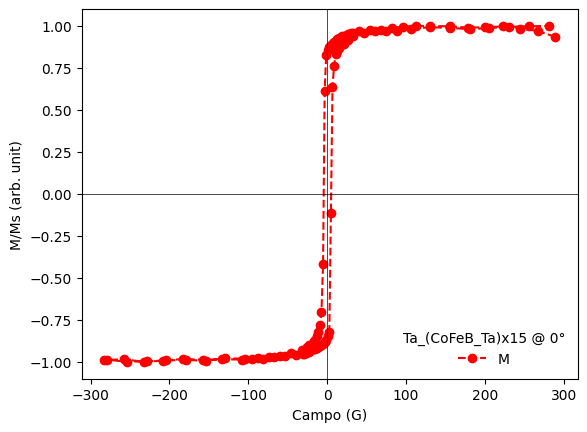

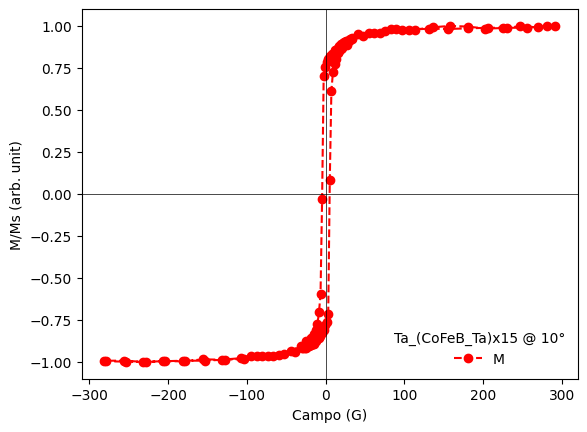

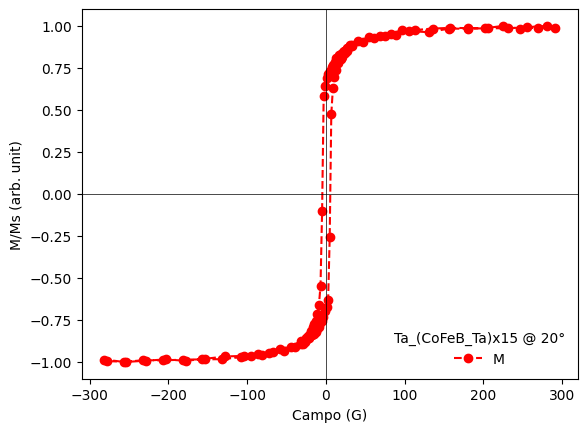

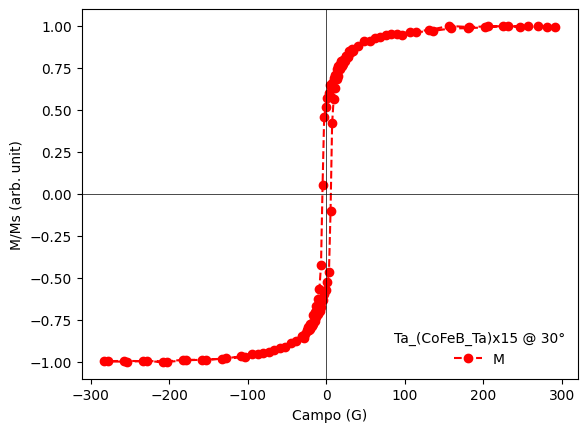

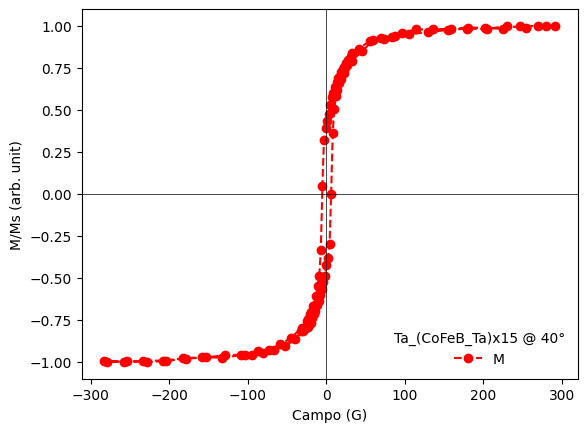

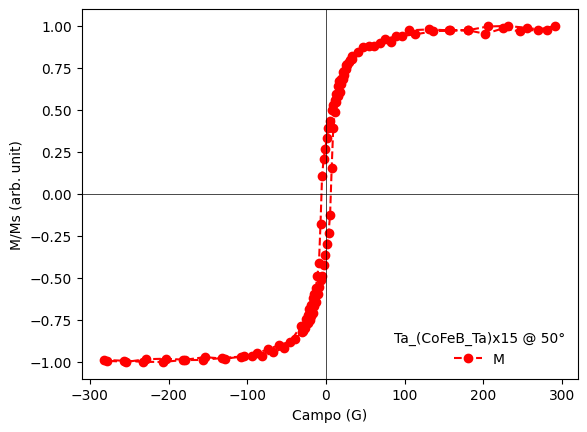

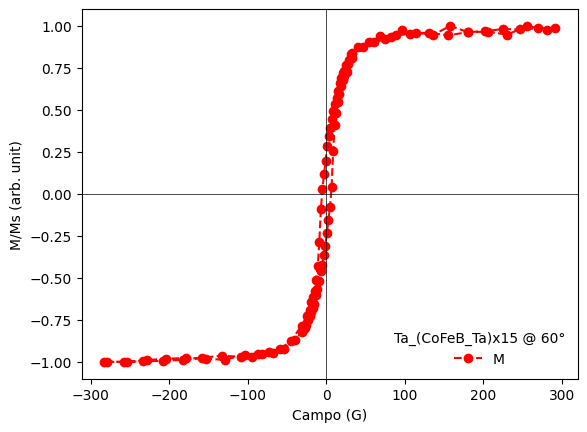

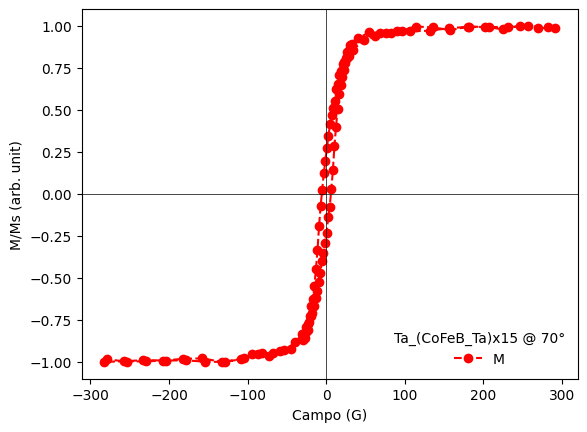

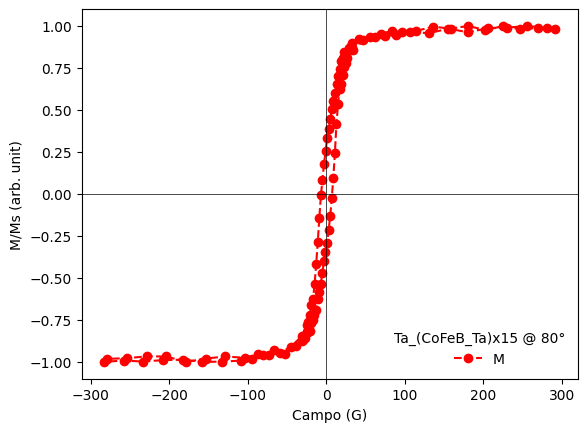

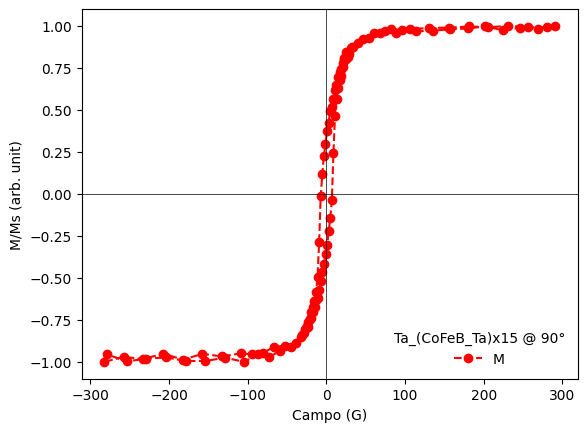

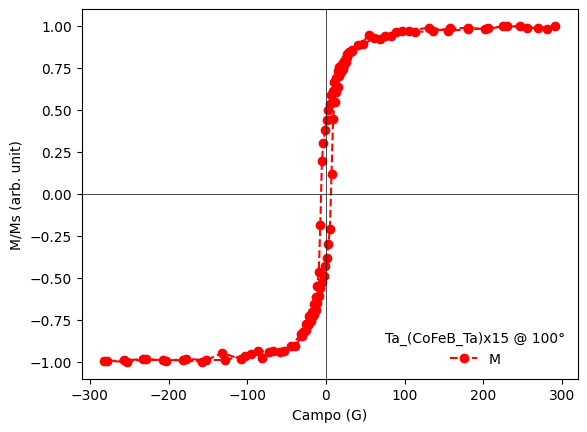

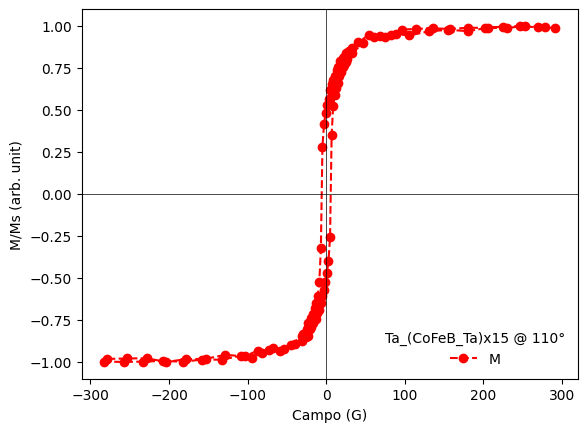

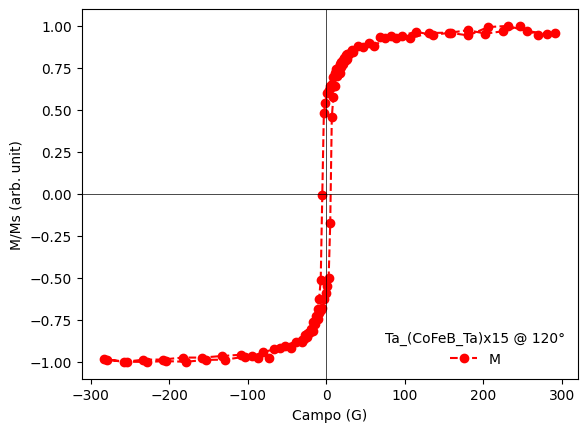

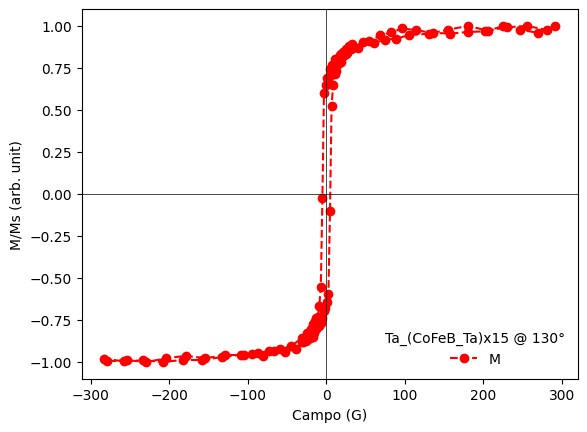

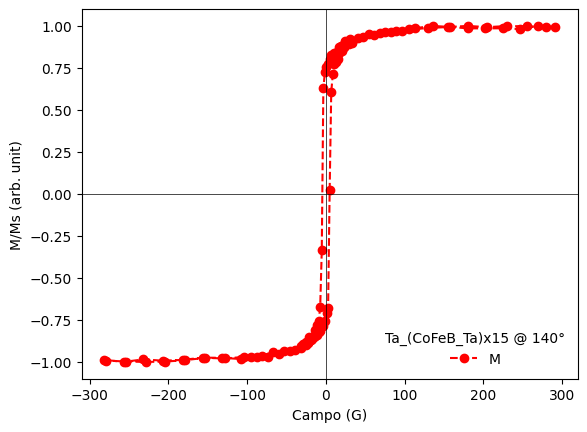

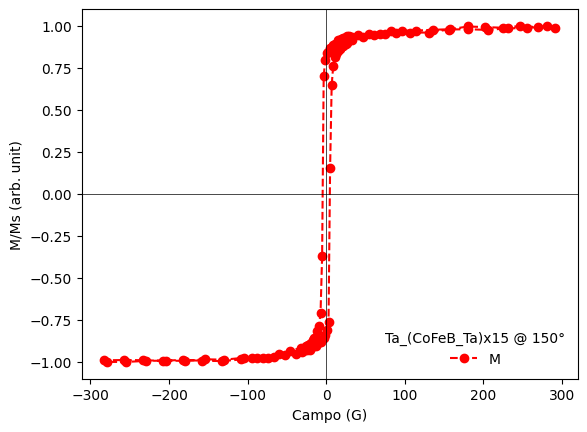

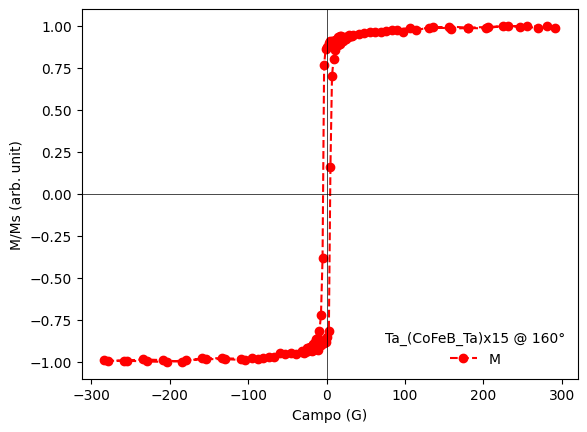

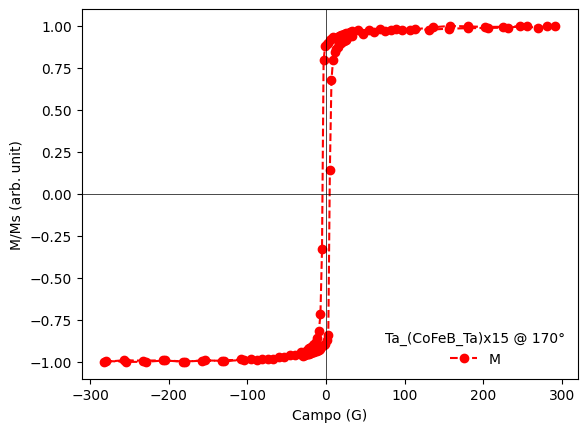

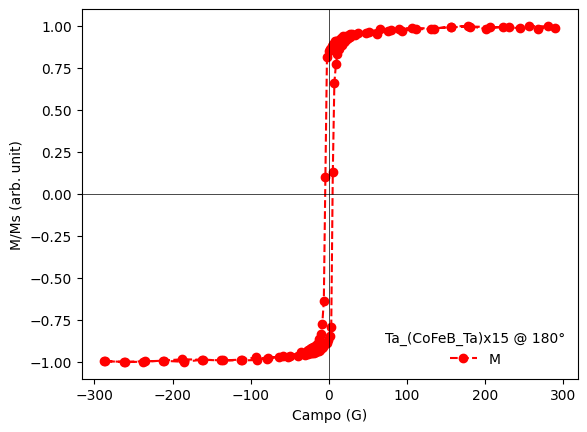

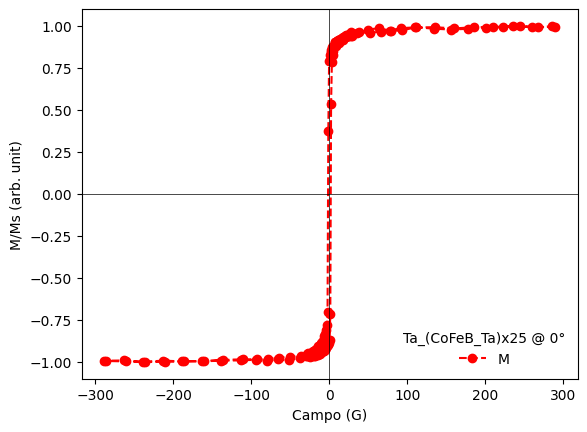

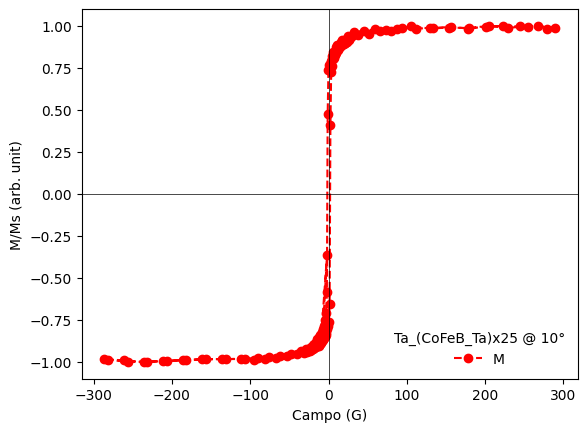

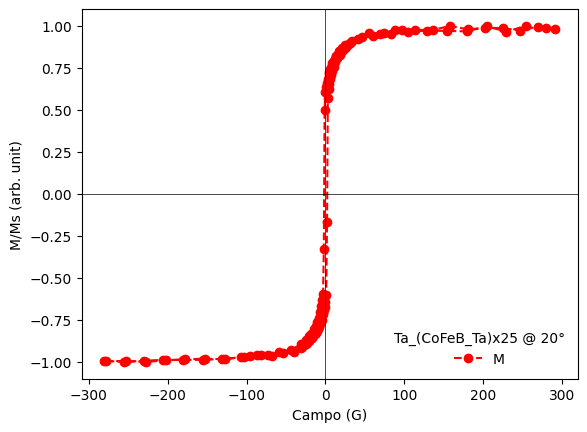

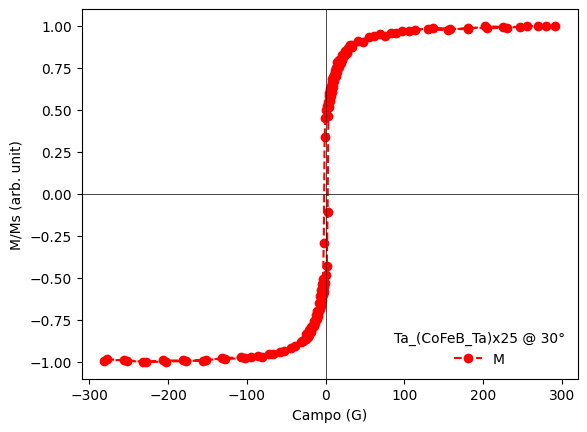

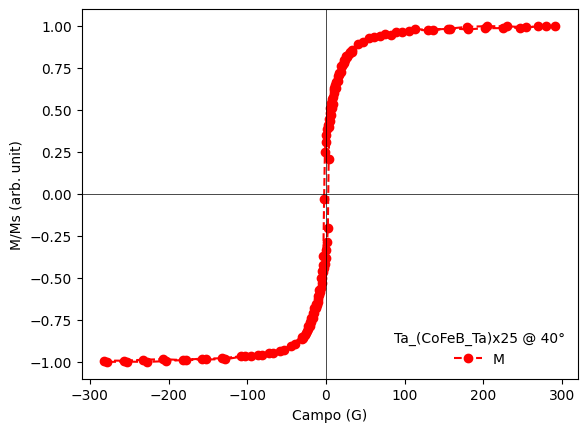

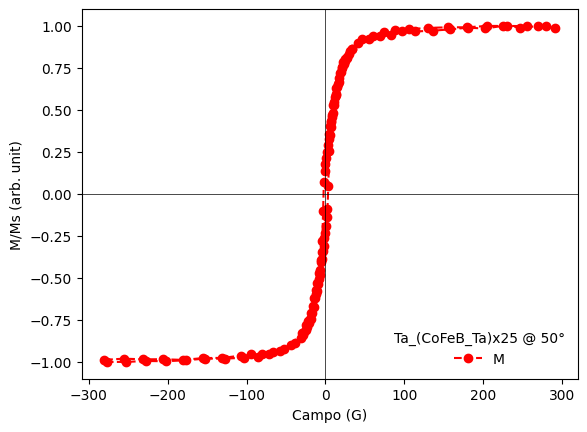

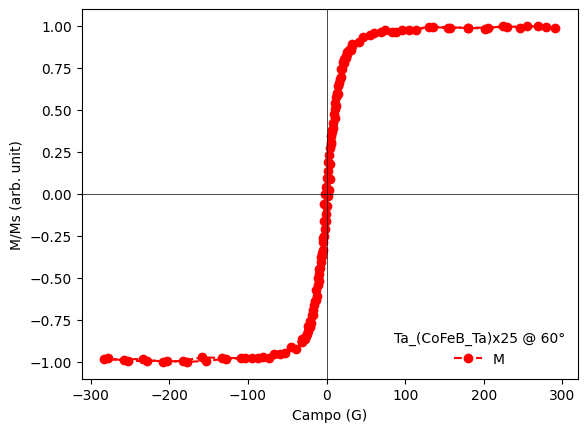

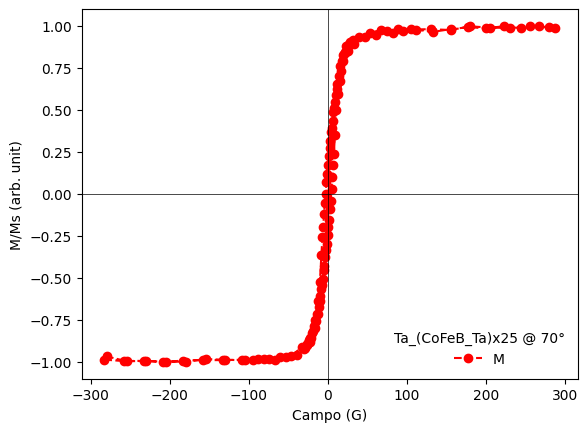

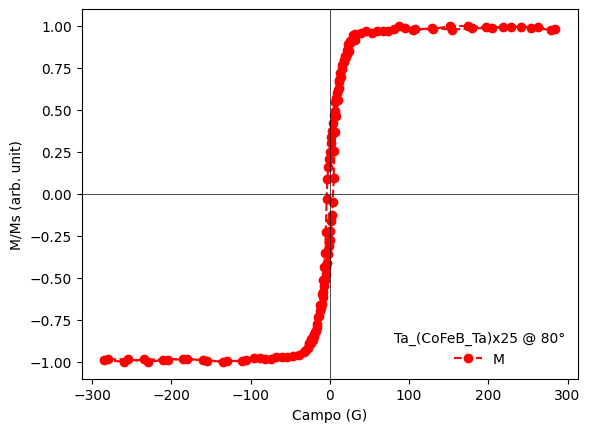

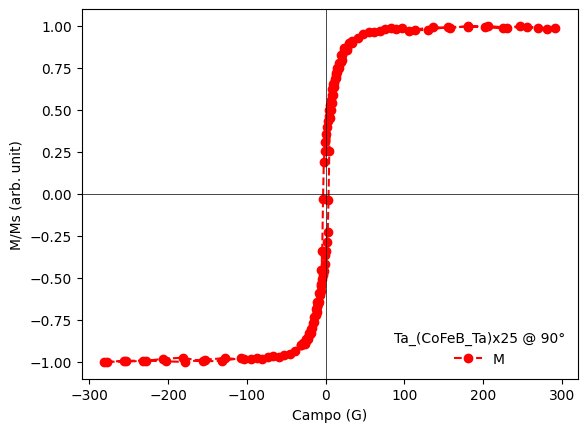

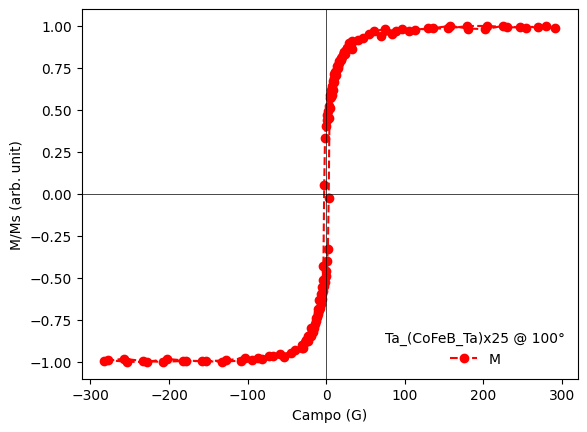

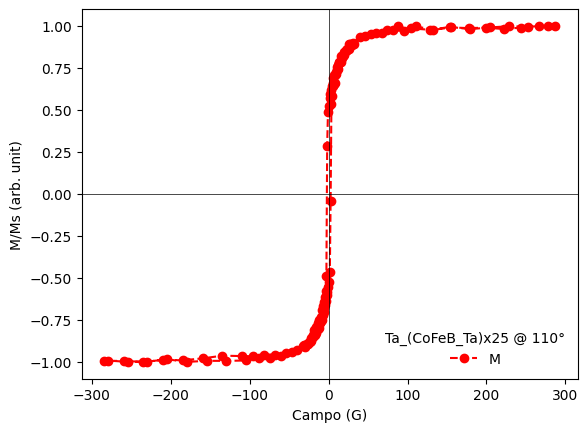

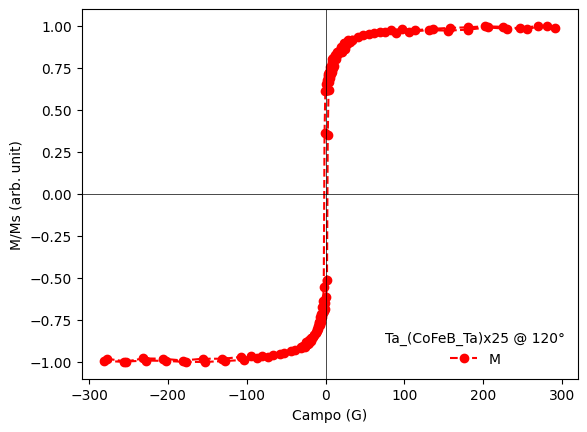

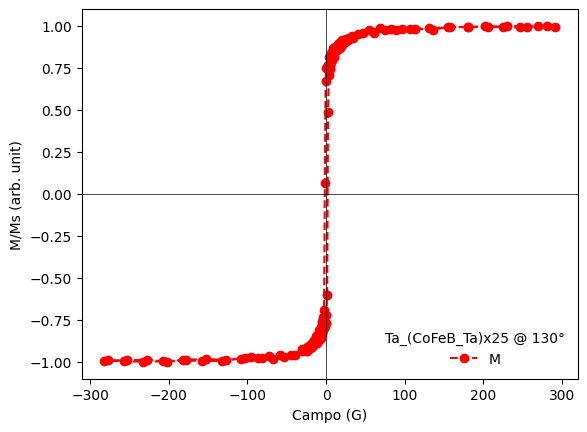

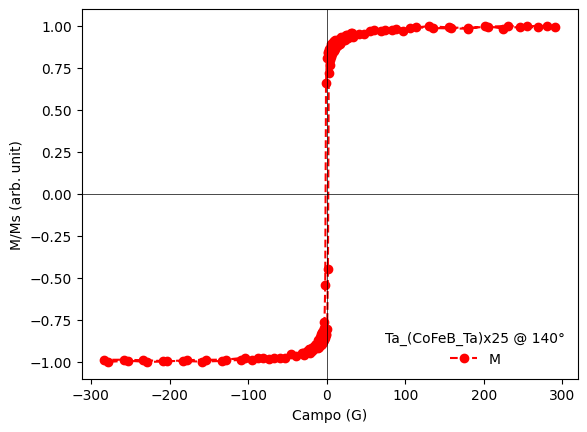

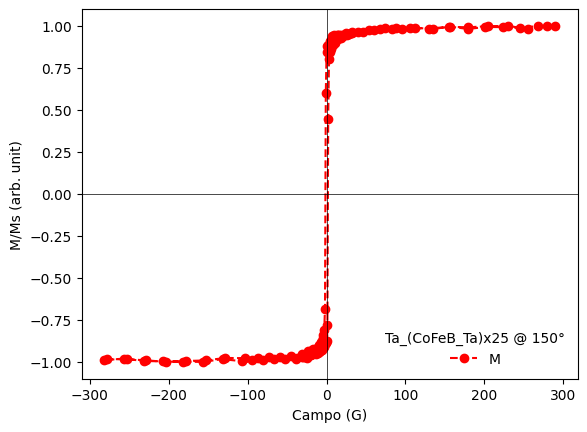

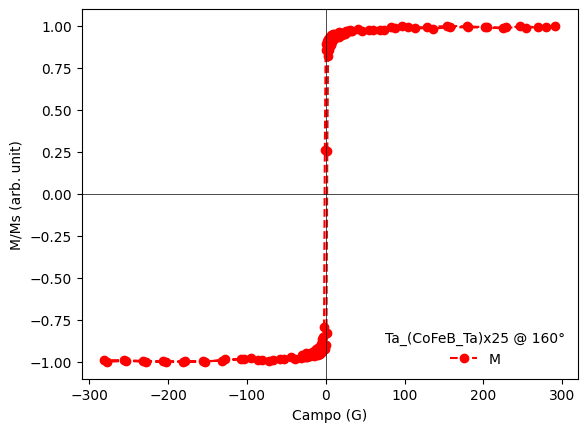

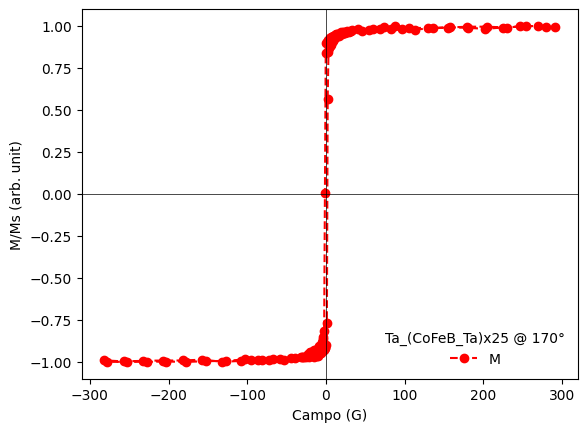

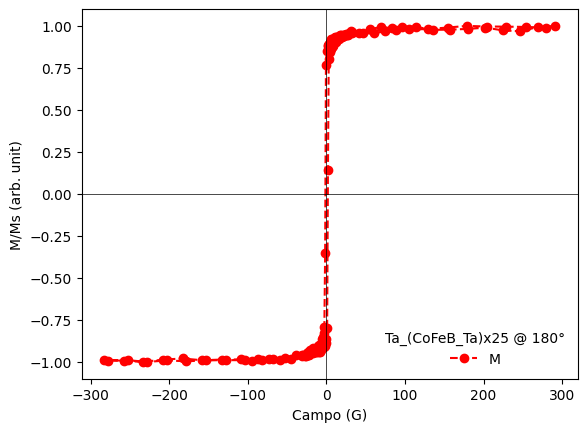

In [10]:

"""
APLICAÇÃO DA NORMALIZAÇÃO
"""

# Itera novamente sobre os arquivos para criar os gráficos -CLEIZA
for arquivo_txt in arquivos_txt:
    #extrai o nome da amostra do arquivo -ABQ
    nomeDaAmostraEAngulo = f"{nomeConcatenadoDaAmostra(arquivo_txt)} @ {extrair_angulo(arquivo_txt)}°"

    # Extrai o ângulo do nome do arquivo -CLEIZA
    angulo = extrair_angulo(arquivo_txt)

    # Caminho completo do arquivo -CLEIZA
    caminho_arquivo = os.path.join(subdiretorioAVarrer, arquivo_txt)
    
    # Carrega os dados do arquivo, ignorando 12 linhas -CLEIZA
    dados = pd.read_csv(caminho_arquivo, header=None, sep=" ")

    # Extrai os dados de campo e magnetização -CLEIZA
    campo = dados[0]
    magnetizacao = dados[1]

    #separando ida e  volta das curvas de magnetizacao -ABQ
    campoDescida = campo[:metadeDoVetor(campo)].copy()
    campoSubida = campo[metadeDoVetor(campo):].copy()
    magnetizacaoDescida = magnetizacao[:metadeDoVetor(magnetizacao)].copy()
    magnetizacaoSubida = magnetizacao[metadeDoVetor(magnetizacao):].copy()
    
    # Normalizando o campo e o momento ao dividir pelo limite dos respectivos eixos -CLEIZA
    magnetizacaoDescidaNormalizada = funcaoNormalizadora(magnetizacaoDescida)
    magnetizacaoSubidaNormalizada = funcaoNormalizadora(magnetizacaoSubida)
    magnetizacaoNormalizada = np.concatenate((magnetizacaoDescidaNormalizada, magnetizacaoSubidaNormalizada))

    """
    PLOTAGEM DO GRÁFICO VISUALIZANDO A NORMALIZAÇÃO
    """

    plt.plot(campo, magnetizacaoNormalizada, "--o", color="red", label="M") #plota os dados brutos -ABQ
    # Plota a curva de histerese em duas metades -CLEIZA
    #plt.plot(campoDescida, magnetizacaoDescidaNormalizada, "--o", color="red", label="Descida")
    #plt.plot(campoSubida, magnetizacaoSubidaNormalizada, "--s", color="blue", label="Subida")
    
    # Adiciona linhas de eixo
    plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
    plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA

    
    # Adiciona título e rótulos com tamanho de fonte personalizado -CLEIZA
    plt.xlabel('Campo (G)')
    plt.ylabel('M/Ms (arb. unit)')
    plt.legend(loc = "lower right", title=f"{nomeDaAmostraEAngulo}", frameon=False)
    
    #cria o diretório onde será salvo os gráficos normalizados, caso nãa exista (esta linha #existe mais para evitar erros estúpidos de pathing) -ABQ
    os.makedirs(f"{dirGraficos}/graficosNormalizados", exist_ok=True) 

    #salva a figura em formato png dentro do diretorio graficosNormalizados, que por sua vez fica no diretorio graficosGerados -ABQ
    plt.savefig(f"{dirGraficos}/graficosNormalizados/{nomeDaAmostraEAngulo} Normalizado.png", dpi=300)

    # Exibe o gráfico -CLEIZA
    plt.show()

    """
    SALVANDO OS DADADOS NORMALIZADOS EM NOVOS ARQUIVOS
    """

    #cria o diretório, caso nãa exista (esta linha existe mais para evitar erros estúpidos de pathing) -ABQ
    os.makedirs(f"{dirDados}/dadosNormalizados", exist_ok=True)

    #salva os dados normalizados em um arquivo .txt -ABQ
    dadosNormalziados = pd.DataFrame({"Campo":campo, "MrMs": magnetizacaoNormalizada})
    dadosNormalziados.to_csv(f"{dirDados}/dadosNormalizados/{arquivo_txt}", sep=" ", header=False, index=False)